# Part I: Linear Regression

In [273]:
import warnings;
warnings.filterwarnings('ignore');

In [274]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import seaborn as sns

In [275]:
# Read in csv file for homework 1
pd.set_option('display.max_columns', None)
dm = pd.read_csv('HOMEWORK_1_DATASET_DIRECT_MARKETING.csv')

# Display the head
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


### Question 1: Histograms
The ditrsibution of AmountSpent is unimodal and skewed right. The distribution of Salary is unimodal and skewed right. For Salary, the second bin from the left dips a little but it is not low enough to call the distribution bimodal. Reference for histogram code: https://realpython.com/python-histograms/

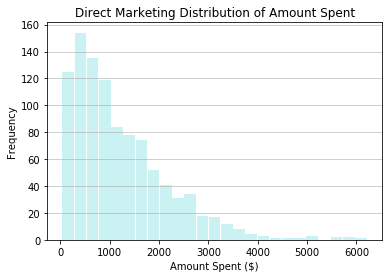

In [276]:
# Create a histogram for AmountSpent

plt.hist(dm['AmountSpent'],
         bins = 25,
         alpha=0.5, 
         rwidth=0.95,
         color='#99e6e6')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Amount Spent ($)')
plt.ylabel('Frequency')
plt.title('Direct Marketing Distribution of Amount Spent')

#plt.legend(loc = 'upper left')

plt.show()

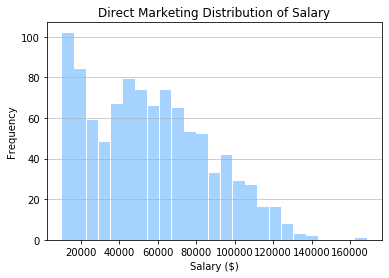

In [277]:
# Create a histogram for AmountSpent
import matplotlib.pyplot as plt

plt.hist(dm['Salary'],
         bins = 25,
         alpha=0.5, 
         rwidth=0.95,
         color='#4da6ff')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.title('Direct Marketing Distribution of Salary')

#plt.legend(loc = 'upper left')

plt.show()

### Question 2: Assumptions - distribution of variables
Amount Spent and Salary are skewed right when regression requires variables to be normally distributed. When standardized and transformed by taking the log of AmountSpent and the square root of Salary, the distributions of both AmountSpent and Salary are approximately normally distributed.

#### AmountSpent

In [278]:
# Check if AmountSpent has any negative numbers even though it would be illogical if there were
neg_chk = np.where(dm['AmountSpent']<0)
print(neg_chk)

(array([], dtype=int64),)


In [279]:
# Check data type
dm['AmountSpent'].dtypes

dtype('int64')

In [280]:
# Check if any fields are null
dm['AmountSpent'].isnull().sum(axis=0)

0

In [281]:
# Transform the variable AmountSpent
dm['AmtSpent_t'] = np.log(dm['AmountSpent'])
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,AmtSpent_t
0,Old,Female,Own,Single,Far,47500,0,High,6,755,6.626718
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,7.183871
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,5.690359
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,7.798113
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,7.173192


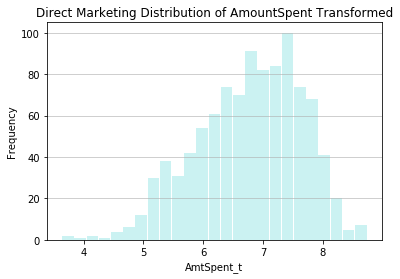

In [282]:
# Create a histogram for AmtSpent_t (log of AmountSpent)

plt.hist(dm['AmtSpent_t'],
         bins = 25,
         alpha=0.5, 
         rwidth=0.95,
         color='#99e6e6')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('AmtSpent_t')
plt.ylabel('Frequency')
plt.title('Direct Marketing Distribution of AmountSpent Transformed')

#plt.legend(loc = 'upper left')

plt.show()

#### Salary

In [283]:
# Check if Salary has any negative numbers even though it would be illogical
neg_chk = np.where(dm['Salary']<0)
print(neg_chk)

(array([], dtype=int64),)


In [284]:
# Check data type
dm['Salary'].dtypes

dtype('int64')

In [285]:
# Check if any fields are null
dm['Salary'].isnull().sum(axis=0)

0

In [286]:
# Transform the variable Salary
#dm['Salary_t'] = np.log(dm['Salary'])**2
dm['Salary_t'] = np.sqrt(dm['Salary'])
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,AmtSpent_t,Salary_t
0,Old,Female,Own,Single,Far,47500,0,High,6,755,6.626718,217.944947
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,7.183871,252.190404
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,5.690359,116.189500
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,7.798113,292.574777
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,7.173192,261.533937


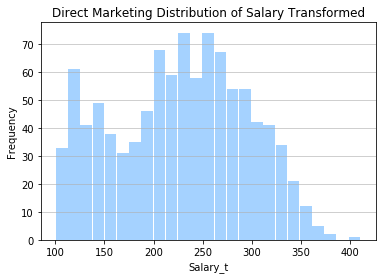

In [287]:
# Create a histogram for Salary_t (square root of Salary)

plt.hist(dm['Salary_t'],
         bins = 25,
         alpha=0.5, 
         rwidth=0.95,
         color='#4da6ff')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Salary_t')
plt.ylabel('Frequency')
plt.title('Direct Marketing Distribution of Salary Transformed')

#plt.legend(loc = 'upper left')

plt.show()

#### Standardize Variables and Create Dummy Variables

In [288]:
# Standardize the variable AmtSpent_t
dm['AmtSpent_t_s'] = preprocessing.scale(dm['AmtSpent_t'])
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,AmtSpent_t,Salary_t,AmtSpent_t_s
0,Old,Female,Own,Single,Far,47500,0,High,6,755,6.626718,217.944947,-0.166236
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,7.183871,252.190404,0.470476
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,5.690359,116.189500,-1.236301
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,7.798113,292.574777,1.172428
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,7.173192,261.533937,0.458272


In [289]:
# Standardize the variable Salary_t
dm['Salary_t_s'] = preprocessing.scale(dm['Salary_t'])
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,AmtSpent_t,Salary_t,AmtSpent_t_s,Salary_t_s
0,Old,Female,Own,Single,Far,47500,0,High,6,755,6.626718,217.944947,-0.166236,-0.135710
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,7.183871,252.190404,0.470476,0.372750
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,5.690359,116.189500,-1.236301,-1.646526
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,7.798113,292.574777,1.172428,0.972357
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,7.173192,261.533937,0.458272,0.511478


In [290]:
# Create dummy variables of categorical variables
dm_cpy = dm.copy()
dm_cpy = pd.get_dummies(dm_cpy, columns=['Age'])
dm_cpy = pd.get_dummies(dm_cpy, columns=['Gender'])
dm_cpy = pd.get_dummies(dm_cpy, columns=['OwnHome'])
dm_cpy = pd.get_dummies(dm_cpy, columns=['Married'])
dm_cpy = pd.get_dummies(dm_cpy, columns=['Location'])
dm_cpy = pd.get_dummies(dm_cpy, columns=['History'])
dm_cpy.head()

,Salary,Children,Catalogs,AmountSpent,AmtSpent_t,Salary_t,AmtSpent_t_s,Salary_t_s,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,755,6.626718,217.944947,-0.166236,-0.135710,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1318,7.183871,252.190404,0.470476,0.372750,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,296,5.690359,116.189500,-1.236301,-1.646526,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,2436,7.798113,292.574777,1.172428,0.972357,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1304,7.173192,261.533937,0.458272,0.511478,1,0,0,1,0,1,0,0,1,1,0,1,0,0


### Question 3: Regularizing Regression Models

In [291]:
# Split into training and test sets
direct_market_vars = dm_cpy[['Age_Young', 'Age_Middle', 'Gender_Female', 'OwnHome_Own', 'Married_Married', 'Location_Close', 'Salary_t_s', 'History_Low', 'History_Medium', 'Catalogs']]
target = dm_cpy[['AmtSpent_t_s']]
x_train, x_test, y_train, y_test = train_test_split(direct_market_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

#### Linear Regression (compare to regularizing models)

In [292]:
# Create an ols regression object
ols = linear_model.LinearRegression()

In [293]:
# Train the model using our training data
model = ols.fit(x_train, y_train)

In [294]:
model.coef_.shape

(1, 10)

In [295]:
# Calculate the Coefficient of Determination, R^2 for the training data
#print(r2_score(y_train, ridge_model_cv.predict(x_train)), r2_score(y_test, model.predict(x_test)))
print("Training set score: {:.2f}".format(model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(model.score(x_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [296]:
# Print the model coefficients
print(model.coef_, model.intercept_)

[[-0.27123043 -0.20875265 -0.04373486  0.00499093 -0.04887465 -0.33858708
   0.51696853 -0.8472527  -0.25835725  0.0446822 ]] [0.06388094]


In [297]:
# Run the model on x_test and show the first five results
list(model.predict(x_test)[0:5])

[array([0.33483086]),
 array([0.62078471]),
 array([0.63941501]),
 array([0.15364208]),
 array([0.9900342])]

#### Ridge Regression

In [298]:
ridge_cv = RidgeCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

In [299]:
# Fit the linear regression with ridge cross-validation
ridge_model_cv = ridge_cv.fit(x_train, y_train)

In [300]:
print(ridge_model_cv.coef_, ridge_model_cv.intercept_)

[[-0.26726335 -0.20440756 -0.04414724  0.00719068 -0.04582682 -0.33749539
   0.5159439  -0.83944988 -0.25421178  0.044779  ]] [0.05318086]


In [301]:
#print(r2_score(y_train, ridge_model_cv.predict(x_train)), r2_score(y_test, ridge_model_cv.predict(x_test)))
print("Training set score: {:.2f}".format(ridge_model_cv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model_cv.score(x_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [302]:
# Run the model on x_test and show the first five results
list(ridge_model_cv.predict(x_test)[0:5])

[array([0.33128214]),
 array([0.61647622]),
 array([0.63705164]),
 array([0.15764993]),
 array([0.98530399])]

In [303]:
# To find the best alpha: 
ridge_model_cv.alpha_

1.0

In [304]:
# Fit linear regression with ridge
ridge = Ridge(alpha = 1.0)

In [305]:
# Fit the linear regression with ridge using best alpha found with ridge cross-validation
ridge_model = ridge.fit(x_train, y_train)

In [306]:
# Print coefficients
print(ridge_model.coef_, ridge_model.intercept_)

[[-0.26726335 -0.20440756 -0.04414724  0.00719068 -0.04582682 -0.33749539
   0.5159439  -0.83944988 -0.25421178  0.044779  ]] [0.05318086]


In [307]:
# Print R^2 for model on both train and test
#print(r2_score(y_train, ridge_model.predict(x_train)), r2_score(y_test, ridge_model.predict(x_test)))
print("Training set score: {:.2f}".format(ridge_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge_model.score(x_test, y_test)))

Training set score: 0.83
Test set score: 0.84


In [308]:
# Run the model on x_test and show the first five results
list(ridge_model.predict(x_test)[0:5])

[array([0.33128214]),
 array([0.61647622]),
 array([0.63705164]),
 array([0.15764993]),
 array([0.98530399])]

#### Lasso Regression

In [309]:
lasso_cv = LassoCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

In [310]:
# Fit the linear regression
lasso_model_cv = lasso_cv.fit(x_train, y_train)

In [311]:
lasso_model_cv

LassoCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], copy_X=True, cv='warn', eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [312]:
# Print coefficients
print(lasso_model_cv.coef_, lasso_model_cv.intercept_)

[-0.1399656  -0.07729944 -0.          0.         -0.         -0.30067768
  0.50828865 -0.77929359 -0.17906626  0.04616718] -0.16574064465171803


In [313]:
# Print R^2 for lasso_model_cv on both train and test
#print(r2_score(y_train, lasso_model_cv.predict(x_train)), r2_score(y_test, lasso_model_cv.predict(x_test)))
print("Training set score: {:.2f}".format(lasso_model_cv.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model_cv.score(x_test, y_test)))

Training set score: 0.82
Test set score: 0.84


In [314]:
# Run the model on x_test and show the first five results
list(lasso_model_cv.predict(x_test)[0:5])

[0.30106618399173257,
 0.6142266921052173,
 0.563404708311096,
 0.30233846345066606,
 0.8470562154433146]

In [315]:
# To find the best alpha: 
lasso_model_cv.alpha_

0.01

In [316]:
# Create lasso regression with best alpha value found with cross-validation
lasso = Lasso(alpha=0.01)

In [317]:
# Fit the linear regression
lasso_model = lasso.fit(x_train, y_train)

In [318]:
lasso_model

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [319]:
# Print coefficients
print(lasso_model.coef_, lasso_model.intercept_)

[-0.1399656  -0.07729944 -0.          0.         -0.         -0.30067768
  0.50828865 -0.77929359 -0.17906626  0.04616718] [-0.16574064]


In [320]:
# Print R^2 for model on both train and test
#print(r2_score(y_train, lasso_model.predict(x_train)), r2_score(y_test, lasso_model.predict(x_test)))
print("Training set score: {:.2f}".format(lasso_model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso_model.score(x_test, y_test)))

Training set score: 0.82
Test set score: 0.84


In [321]:
# Run the model on x_test and show the first five results
list(lasso_model.predict(x_test)[0:5])

[0.30106618399173257,
 0.6142266921052173,
 0.563404708311096,
 0.30233846345066606,
 0.8470562154433146]

### Question 4: Residuals Plot
The residual plot shows no discernable pattern, which indicates a linear relationship between the predictors and the response. Aside from a few extreme points on the left, the plot also shows constant variance among the residuals.

In [322]:
y_test_plot = y_test
y_test_plot['preds'] = model.predict(x_test)
y_test_plot['residuals'] = y_test_plot['AmtSpent_t_s'] - y_test_plot['preds']

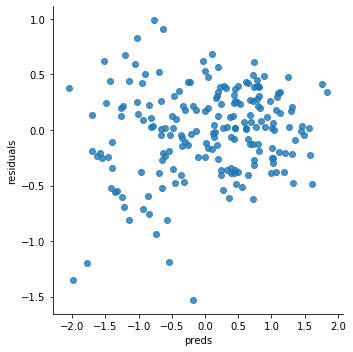

In [323]:
# Create a residual plot
sns.lmplot('preds', 'residuals', data=y_test_plot, fit_reg=False)

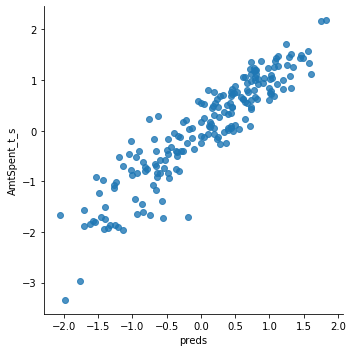

In [324]:
# Create a scatter plot of the actual response against the predicted values
sns.lmplot('preds', 'AmtSpent_t_s', data=y_test_plot, fit_reg=False)

# Part II: Classification

In [1]:
import warnings;
warnings.filterwarnings('ignore');

In [2]:
# Import libraries
import csv
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
header = ['recnum', 'schedtime', 'carrier', 'deptime', 'dest', 'distance', 'date', 'flightnumber', 'origin', 'weather', 'dayweek', 'daymonth', 'tailnu', 'delay']

# open a new CSV file and write the header fields
# open the text file and write the contents to the new CSV file
with open('/Users/lisaover/Google Drive/_MLIS/Data Mining/Homework/flight_delays.csv', 'wt', newline ='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(i for i in header)
    with open('/Users/lisaover/Google Drive/_MLIS/Data Mining/Homework/flight_delays.txt') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_cnt = 0
        for row in csv_reader:
            if line_cnt > 0:
                writer.writerow(row)
            line_cnt += 1
file.close()

# Load the new CSV file into a dataframe
fd = pd.read_csv("/Users/lisaover/Google Drive/_MLIS/Data Mining/Homework/flight_delays.csv")

In [4]:
fd.head()

,recnum,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [5]:
fd.delay.unique()

array(['ontime', 'delayed'], dtype=object)

In [6]:
#Check dataframe shape
fd.shape

(2201, 14)

In [7]:
#Check nulls per column
fd.isnull().sum(axis = 0)

recnum          0
schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
dtype: int64

### Question 5: Balance of 'delayed' column

In [8]:
# Count of delayed vs. ontime flights
fd.groupby('delay')['recnum'].nunique()

delay
delayed     428
ontime     1773
Name: recnum, dtype: int64

In [9]:
# Proportion of delayed flights
delayed = 428/1773
print(delayed)

0.24139875916525663


### Question 6: Logistic Regression
I tried a few different values for Cs, all of which were integers so the grid of values would be chosen randomly on the logarithmic scale between 0.0001 and 1000, per the documentation. I chose 10, 50, 100, and 200. When Cs was 10, the test AUC droped by 1 percentage point. The AUC using the other values for Cs did not change so I used Cs=100.

In [10]:
# Standardize the variable distance
fd['distance_s'] = preprocessing.scale(fd['distance'])
fd.head()

,recnum,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,distance_s
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime,-2.093425
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime,0.084768
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime,1.286529
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime,1.286529
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime,1.286529


In [11]:
fd_cpy = fd.copy()

# Create dummy variables of categorical variables
fd_cpy = pd.get_dummies(fd_cpy, columns=['carrier'])
fd_cpy = pd.get_dummies(fd_cpy, columns=['dest'])
fd_cpy = pd.get_dummies(fd_cpy, columns=['origin'])
fd_cpy = pd.get_dummies(fd_cpy, columns=['delay'])

# Convert date to datetime type
fd_cpy['date_dt'] = pd.to_datetime(fd_cpy['date'])
fd_cpy['epoch'] = pd.to_datetime("1960-01-01")
fd_cpy['numdays_dt'] = fd_cpy['date_dt'] - fd_cpy['epoch']
fd_cpy['numdays_dt'] = fd_cpy['numdays_dt'].dt.days

# Convert number of days to a category
#fd_cpy['numdays_dt'] = fd_cpy['numdays_dt'].astype('category')

fd_cpy.head()

,recnum,schedtime,deptime,distance,date,flightnumber,weather,dayweek,daymonth,tailnu,...,dest_JFK,dest_LGA,origin_BWI,origin_DCA,origin_IAD,delay_delayed,delay_ontime,date_dt,epoch,numdays_dt
0,1,1455,1455,184,1/1/2004,5935,0,4,1,N940CA,...,1,0,1,0,0,0,1,2004-01-01,1960-01-01,16071
1,2,1640,1640,213,1/1/2004,6155,0,4,1,N405FJ,...,1,0,0,1,0,0,1,2004-01-01,1960-01-01,16071
2,3,1245,1245,229,1/1/2004,7208,0,4,1,N695BR,...,0,1,0,0,1,0,1,2004-01-01,1960-01-01,16071
3,4,1715,1709,229,1/1/2004,7215,0,4,1,N662BR,...,0,1,0,0,1,0,1,2004-01-01,1960-01-01,16071
4,5,1039,1035,229,1/1/2004,7792,0,4,1,N698BR,...,0,1,0,0,1,0,1,2004-01-01,1960-01-01,16071


In [12]:
# This was not in the assignment but I was curious how to convert integers to times and 
# then create a combined datetime variable with the date and time

# Convert schedtime and deptime to time type
fd_cpy['schedtime_tm'] = pd.to_datetime(fd_cpy['schedtime'], format='%H%M').dt.time 
fd_cpy['deptime_tm'] = pd.to_datetime(fd_cpy['deptime'], format='%H%M').dt.time

# Combine the date and time for both schedtime and deptime
fd_cpy['scheduled_dt'] = pd.to_datetime(fd_cpy["date_dt"].astype(str) + " " + fd_cpy["schedtime_tm"].astype(str))
fd_cpy['departure_dt'] = pd.to_datetime(fd_cpy["date_dt"].astype(str) + " " + fd_cpy["deptime_tm"].astype(str))

date_chk = fd_cpy[(fd_cpy['departure_dt'] < fd_cpy['scheduled_dt']) & (fd_cpy['delay_delayed']==1)]
date_chk.head()

fd_cpy.head()

,recnum,schedtime,deptime,distance,date,flightnumber,weather,dayweek,daymonth,tailnu,...,origin_IAD,delay_delayed,delay_ontime,date_dt,epoch,numdays_dt,schedtime_tm,deptime_tm,scheduled_dt,departure_dt
0,1,1455,1455,184,1/1/2004,5935,0,4,1,N940CA,...,0,0,1,2004-01-01,1960-01-01,16071,14:55:00,14:55:00,2004-01-01 14:55:00,2004-01-01 14:55:00
1,2,1640,1640,213,1/1/2004,6155,0,4,1,N405FJ,...,0,0,1,2004-01-01,1960-01-01,16071,16:40:00,16:40:00,2004-01-01 16:40:00,2004-01-01 16:40:00
2,3,1245,1245,229,1/1/2004,7208,0,4,1,N695BR,...,1,0,1,2004-01-01,1960-01-01,16071,12:45:00,12:45:00,2004-01-01 12:45:00,2004-01-01 12:45:00
3,4,1715,1709,229,1/1/2004,7215,0,4,1,N662BR,...,1,0,1,2004-01-01,1960-01-01,16071,17:15:00,17:09:00,2004-01-01 17:15:00,2004-01-01 17:09:00
4,5,1039,1035,229,1/1/2004,7792,0,4,1,N698BR,...,1,0,1,2004-01-01,1960-01-01,16071,10:39:00,10:35:00,2004-01-01 10:39:00,2004-01-01 10:35:00


In [13]:
fd_cpy.dtypes

recnum                    int64
schedtime                 int64
deptime                   int64
distance                  int64
date                     object
flightnumber              int64
weather                   int64
dayweek                   int64
daymonth                  int64
tailnu                   object
distance_s              float64
carrier_CO                uint8
carrier_DH                uint8
carrier_DL                uint8
carrier_MQ                uint8
carrier_OH                uint8
carrier_RU                uint8
carrier_UA                uint8
carrier_US                uint8
dest_EWR                  uint8
dest_JFK                  uint8
dest_LGA                  uint8
origin_BWI                uint8
origin_DCA                uint8
origin_IAD                uint8
delay_delayed             uint8
delay_ontime              uint8
date_dt          datetime64[ns]
epoch            datetime64[ns]
numdays_dt                int64
schedtime_tm             object
deptime_

In [37]:
# Split into training and test sets
target = fd_cpy[['delay_delayed', 'flightnumber', 'tailnu']]
flight_delay_vars = fd_cpy[['schedtime', 'deptime', 'distance_s', 'numdays_dt', 'weather', 'dayweek', 
                            'daymonth', 'carrier_CO', 'carrier_DH', 'carrier_MQ', 'carrier_OH', 'carrier_US', 
                            'carrier_RU', 'carrier_UA', 'dest_EWR', 'dest_JFK', 'dest_LGA', 'origin_BWI', 
                            'origin_DCA', 'origin_IAD']]
flight_delay_vars = fd_cpy[['schedtime', 'deptime', 'distance_s', 'numdays_dt', 'weather', 'dayweek', 
                            'daymonth', 'carrier_CO', 'carrier_DH', 'carrier_MQ', 'carrier_OH', 
                            'carrier_RU', 'carrier_UA', 'dest_EWR', 'dest_JFK', 'origin_BWI', 
                            'origin_DCA']]
x_train, x_test, y_train, y_test = train_test_split(flight_delay_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [23]:
# Perform logistic regression with the statsmodels package
logit_model=sm.Logit(y_train['delay_delayed'], x_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35
                           Results: Logit
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    delay_delayed      AIC:                inf   
Date:                  2020-01-29 14:30   BIC:                inf   
No. Observations:      1760               Log-Likelihood:     -inf  
Df Model:              17                 LL-Null:            0.0000
Df Residuals:          1742               LLR p-value:        1.0000
Converged:             0.0000             Scale:              1.0000
No. Iterations:        35.0000                                      
--------------------------------------------------------------------
            Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------
schedtime   -0.0286    0.0021 -13.8406 0.0000     -0.0327    -0.0246
deptime      0.0291    0.0021  14.1635 0.0000      0.0251     0.0331


/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/lisaover/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [24]:
# Create logistic regression CV object 
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           l1_ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                           Cs = 100,
                           n_jobs = -1,
                           random_state = 0
)

In [25]:
# Fit using training sets from split with all variables
clf_model = clf.fit(x_train, y_train['delay_delayed'])

In [26]:
# Examine the coefficients
clf_model.coef_

array([[-2.38183706e-02,  2.42626821e-02, -2.98788276e-05,
        -1.40880207e-04,  9.13935759e-06, -1.01676221e-04,
         2.16436498e-03,  4.62181121e-06, -1.16302725e-05,
         3.41233164e-05, -3.92218919e-06,  5.51483013e-08,
         1.10941619e-05, -1.35985024e-06,  1.44180461e-05,
        -5.74337394e-06, -8.30953393e-06,  1.03560748e-06,
         1.11137991e-06, -2.27392581e-06]])

In [27]:
# Fit and assess the results in terms of AUC on the training data
x_train_probs = clf_model.predict_proba(x_train)

In [28]:
# Convert the array to a dataframe so to see what the probabilities look like for the training model
x_train_probs_df = pd.DataFrame(x_train_probs)
x_train_probs_df.columns = ['trainprobs' + str(col) for col in x_train_probs_df.columns]
x_train_probs_df.head()

,trainprobs0,trainprobs1
0,0.953319,0.046681
1,0.795531,0.204469
2,0.880365,0.119635
3,0.830711,0.169289
4,0.705833,0.294167


In [29]:
# Add predictions to x_train and y_train sets
x_trainx = x_train.copy()
x_trainx['probabilities_1'] = x_train_probs[:,1]
x_trainx.head()

,schedtime,deptime,distance_s,numdays_dt,weather,dayweek,daymonth,carrier_CO,carrier_DH,carrier_MQ,...,carrier_US,carrier_RU,carrier_UA,dest_EWR,dest_JFK,dest_LGA,origin_BWI,origin_DCA,origin_IAD,probabilities_1
987,700,655,-3.220077,16084,0,3,14,0,0,0,...,0,1,0,1,0,0,1,0,0,0.046681
375,2120,2118,0.084768,16076,0,2,6,0,1,0,...,0,0,0,1,0,0,0,0,1,0.204469
1071,645,643,-0.966774,16085,0,4,15,0,0,0,...,0,1,0,1,0,0,0,1,0,0.119635
37,1730,1726,-0.966774,16071,0,4,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0.169289
282,700,744,-3.220077,16075,0,1,5,0,0,0,...,0,1,0,1,0,0,1,0,0,0.294167


In [30]:
# Fit and assess the results in terms of AUC on the training data
x_test_probs = clf_model.predict_proba(x_test)

In [31]:
# Convert the array to a dataframe so to see what the probabilities look like for the test model
x_test_probs_df = pd.DataFrame(x_test_probs)
x_test_probs_df.columns = ['testprobs' + str(col) for col in x_test_probs_df.columns]
x_test_probs_df.head()

,testprobs0,testprobs1
0,0.830871,0.169129
1,0.874556,0.125444
2,0.952774,0.047226
3,0.811105,0.188895
4,0.918711,0.081289


In [32]:
# Add predictions to x_train and y_train sets
x_testx = x_test.copy()
x_testx['probabilities_1'] = x_test_probs[:,1]
x_testx.head()

,schedtime,deptime,distance_s,numdays_dt,weather,dayweek,daymonth,carrier_CO,carrier_DH,carrier_MQ,...,carrier_US,carrier_RU,carrier_UA,dest_EWR,dest_JFK,dest_LGA,origin_BWI,origin_DCA,origin_IAD,probabilities_1
1276,1645,1641,1.211419,16089,0,1,19,0,1,0,...,0,0,0,0,1,0,0,0,1,0.169129
1446,630,630,0.159878,16091,0,3,21,0,0,0,...,0,0,0,0,0,1,0,1,0,0.125444
335,600,558,0.084768,16076,0,2,6,0,0,1,...,0,0,0,0,1,0,0,1,0,0.047226
1458,1830,1828,0.159878,16091,0,3,21,0,0,0,...,0,0,0,0,0,1,0,1,0,0.188895
2038,1800,1758,0.159878,16099,0,4,29,0,0,0,...,1,0,0,0,0,1,0,1,0,0.081289


### Question 7: ROC Curves
The AUC for the training and test data are 0.8528 and 0.8256, respectively. The test set AUC is lower than the training set AUC, indicating a slight overfit. However the difference is only 0.0272, which is less than 0.03. Therefore, the model is adequate and neither over nor under fit.

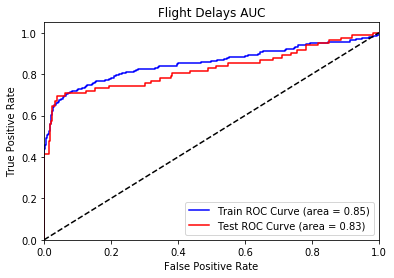

In [33]:
# Visualize these ROC curves with matplotlib

plt.plot(roc_curve(y_train['delay_delayed'], x_trainx['probabilities_1'])[0],roc_curve(y_train['delay_delayed'], x_trainx['probabilities_1'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train['delay_delayed'], x_trainx['probabilities_1']))

plt.plot(roc_curve(y_test['delay_delayed'], x_testx['probabilities_1'])[0],roc_curve(y_test['delay_delayed'], x_testx['probabilities_1'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test['delay_delayed'], x_testx['probabilities_1']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight Delays AUC')
plt.legend()
plt.show()

In [34]:
# Calculate the AUC for the training data
fpr, tpr, thresholds = metrics.roc_curve(y_train['delay_delayed'], x_trainx['probabilities_1'])
metrics.auc(fpr, tpr)

0.8528259927561707

In [35]:
# Calculate the AUC for the test data
fpr, tpr, thresholds = metrics.roc_curve(y_test['delay_delayed'], x_testx['probabilities_1'])
metrics.auc(fpr, tpr)

0.8255655954888239

In [36]:
# The difference between the training and test set AUC measures
0.8528 - 0.8256

0.027200000000000002

### Question 8: Confusion Matrix and Metrics

In [448]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])


In [449]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_test['delay_delayed'], x_testx['probabilities_1'])
print(threshold)

[0.16669450578658415]


In [450]:
# Predict response (delays) from model probabilities (x_test[predictions_1]) and the chosen threshold
x_testx['resp'] = x_testx['probabilities_1'].map(lambda x: 1 if x > 0.1667 else 0)

In [451]:
# Create confusion matrix
pd.crosstab(y_test['delay_delayed'], x_testx['resp'],
            rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,252,107,359
1,21,61,82
All,273,168,441


#### Sensitivity (Recall)

In [452]:
61/(61+21)

0.7439024390243902

#### Specificity

In [453]:
252/(252+107)

0.7019498607242339

#### Positive Predictive Value (PPV) (Precision)

In [454]:
61/(61+107)

0.3630952380952381

#### Negative Predictive Value (NPV)

In [455]:
252/(252+21)

0.9230769230769231

#### F1 Score

In [456]:
(2*0.3631*0.7439)/(0.3631+0.7439)

0.488003775971093

#### Accuracy

In [457]:
(61+252)/441

0.7097505668934241

### Question 9: KKN
The logistic regression model and the KNN model perform equally well:

--Training AUC=0.8528 for logistic and training AUC=0.8556 for KNN

--Test AUC=0.8256 for both logistic and KNN

In [458]:
# Convert x_train, x_test, y_train['delay_delayed'], and y_test['delay_delayed'] to numpy arrays
x_train_arry = x_train.values
x_test_arry = x_test.values
type(x_train_arry)

numpy.ndarray

In [459]:
# Train the learner
knn_clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')

In [460]:
knn_model = clf.fit(x_train_arry, y_train['delay_delayed'])

In [461]:
# Accuracy on training data
knn_model.score(x_train_arry, y_train['delay_delayed'])

0.8863636363636364

In [462]:
# Accuracy on test data
knn_model.score(x_test_arry, y_test['delay_delayed'])

0.8843537414965986

In [463]:
# Find the probabilities produced by this model
knn_probs_train = knn_model.predict_proba(x_train_arry)
knn_probs_test = knn_model.predict_proba(x_test_arry)
knn_probs_test

array([[0.83087165, 0.16912835],
       [0.87455525, 0.12544475],
       [0.95277395, 0.04722605],
       [0.81110418, 0.18889582],
       [0.91871029, 0.08128971],
       [0.93256031, 0.06743969],
       [0.83251587, 0.16748413],
       [0.93181341, 0.06818659],
       [0.85222165, 0.14777835],
       [0.61952707, 0.38047293],
       [0.93592327, 0.06407673],
       [0.82363293, 0.17636707],
       [0.93090792, 0.06909208],
       [0.82839531, 0.17160469],
       [0.58961749, 0.41038251],
       [0.87368312, 0.12631688],
       [0.751479  , 0.248521  ],
       [0.69881516, 0.30118484],
       [0.88056757, 0.11943243],
       [0.92841378, 0.07158622],
       [0.83752236, 0.16247764],
       [0.83266687, 0.16733313],
       [0.95340864, 0.04659136],
       [0.82743373, 0.17256627],
       [0.81024173, 0.18975827],
       [0.87520373, 0.12479627],
       [0.88499189, 0.11500811],
       [0.53641136, 0.46358864],
       [0.86399611, 0.13600389],
       [0.93505172, 0.06494828],
       [0.

In [464]:
# Produce these predictions in the dataframe
x_trainz = x_train.copy()
x_testz = x_test.copy()
x_trainz['KNN_PROBS'] = knn_probs_train[:, 1]
x_testz['KNN_PROBS'] = knn_probs_test[:, 1]
x_testz['KNN_PREDS'] = knn_model.predict(x_test_arry)

In [465]:
x_testz.head()

,schedtime,deptime,distance_s,numdays_dt,weather,dayweek,daymonth,carrier_CO,carrier_DH,carrier_MQ,carrier_OH,carrier_RU,carrier_UA,dest_EWR,dest_JFK,origin_BWI,origin_DCA,KNN_PROBS,KNN_PREDS
1276,1645,1641,1.211419,16089,0,1,19,0,1,0,0,0,0,0,1,0,0,0.169128,0
1446,630,630,0.159878,16091,0,3,21,0,0,0,0,0,0,0,0,0,1,0.125445,0
335,600,558,0.084768,16076,0,2,6,0,0,1,0,0,0,0,1,0,1,0.047226,0
1458,1830,1828,0.159878,16091,0,3,21,0,0,0,0,0,0,0,0,0,1,0.188896,0
2038,1800,1758,0.159878,16099,0,4,29,0,0,0,0,0,0,0,0,0,1,0.081290,0


In [466]:
fpr, tpr, thresholds = metrics.roc_curve(y_train['delay_delayed'], x_trainz['KNN_PROBS'])
metrics.auc(fpr, tpr)

0.8528259927561707

In [484]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['delay_delayed'], x_testz['KNN_PROBS'])
metrics.auc(fpr, tpr)

0.8255655954888239

In [479]:
# Find the best value of K for our model with cross-validation
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(x_trainz, y_train['delay_delayed'])

In [480]:
# Create a pipeline
pipe = Pipeline([('standardizer', StandardScaler()), ('knn', knn)])

# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [482]:
# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_trainz, y_train['delay_delayed'])

In [483]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

3

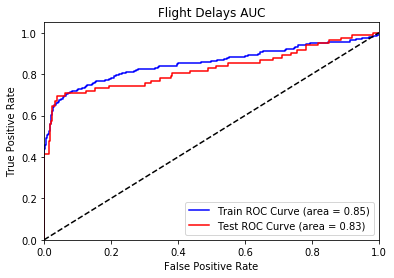

In [492]:
# Visualize these ROC curves with matplotlib

plt.plot(roc_curve(y_train['delay_delayed'], x_trainz['KNN_PROBS'])[0],roc_curve(y_train['delay_delayed'], x_trainz['KNN_PROBS'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train['delay_delayed'], x_trainz['KNN_PROBS']))

plt.plot(roc_curve(y_test['delay_delayed'], x_testz['KNN_PROBS'])[0],roc_curve(y_test['delay_delayed'], x_testz['KNN_PROBS'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test['delay_delayed'], x_testz['KNN_PROBS']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight Delays AUC')
plt.legend()
plt.show()